<a href="https://colab.research.google.com/github/TBergsData/Medicaid/blob/main/Medicaid_Rx.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


**HIDING CELLS**

You right-click on the area on the left of the cell (below the "Play" button) and choose "Add a form"

You can enter a title for your cell after the #@title keyword (first line in your cell code)

Right-click again in the same place and choose "Form > Hide code"

**CHANGING CELL TYPES AND KEYBOARD SHORTCUTS**

Control m m will convert a code cell to a text cell. Control m y will convert a text cell to a code cell.

The full list of keyboard shortcuts is available under 'Keyboard shortcuts' in the Tools menu.

**LINKING TO OTHER SECTIONS IN NOTEBOOK**



## **Skip to:**

[Medicaid Drug Utilization (SQLite)](#medicaid_rx)

### Import Helper Libraries

In [1]:
import numpy as np
import pandas as pd
from copy import deepcopy
import sys
import matplotlib.pyplot as plt
import seaborn as sns

<a name="medicaid_rx"></a>
##**Medicaid Drug Utilization**
[Back to Beginning](#Beginning)  

https://download.medicaid.gov/data/DrugUtilization2021_revisedsep2022.csv  
https://download.medicaid.gov/data/nadac-national-average-drug-acquisition-cost-09-07-2022.csv  
https://download.medicaid.gov/data/DrugUtilization2022.csv  
https://download.medicaid.gov/data/state-drug-utilization-data-2020.csv  
https://download.medicaid.gov/data/state-drug-utilization-data-2019.csv  
https://www.medicaid.gov/medicaid/prescription-drugs/state-drug-utilization-data/state-drug-utilization-data-faq/index.html  
https://nida.nih.gov/sites/default/files/overdose_data_1999-2020-5.16.22.xlsx


Read in drug utilization data from Medicaid website and inspect first few rows.

In [18]:
df_2020 = pd.read_csv('https://download.medicaid.gov/data/state-drug-utilization-data-2020.csv')

In [19]:
df_2020.head()

,Utilization Type,State,NDC,Labeler Code,Product Code,Package Size,Year,Quarter,Supression Used,Product Name,Units Reimbursed,Number of Prescriptions,Total Amount Reimbursed,Medicaid Amount Reimbursed,Non Medicaid Amount Reimbursed
0,FFSU,AK,74433907,74,4339,7.0,2020,2,True,HUMIRA PEN,NaN,NaN,NaN,NaN,NaN
1,FFSU,AK,93504501,93,5045,1.0,2020,3,True,DEXMETHYLP,NaN,NaN,NaN,NaN,NaN
2,FFSU,AK,143988601,143,9886,1.0,2020,3,True,AMOXICILLI,NaN,NaN,NaN,NaN,NaN
3,FFSU,AK,536106210,536,1062,10.0,2020,1,True,STOOL SOFT,NaN,NaN,NaN,NaN,NaN
4,FFSU,AK,23155010305,23155,103,5.0,2020,4,True,METFORMIN,NaN,NaN,NaN,NaN,NaN


In [33]:
df_2020.columns

Index(['Utilization Type', 'State', 'NDC', 'Labeler Code', 'Product Code',
       'Package Size', 'Year', 'Quarter', 'Supression Used', 'Product Name',
       'Units Reimbursed', 'Number of Prescriptions',
       'Total Amount Reimbursed', 'Medicaid Amount Reimbursed',
       'Non Medicaid Amount Reimbursed'],
      dtype='object')

In [34]:
# Replace spaces with underscores in column names
df_2020.columns = df_2020.columns.str.replace(' ','_')
df_2020.columns

Index(['Utilization_Type', 'State', 'NDC', 'Labeler_Code', 'Product_Code',
       'Package_Size', 'Year', 'Quarter', 'Supression_Used', 'Product_Name',
       'Units_Reimbursed', 'Number_of_Prescriptions',
       'Total_Amount_Reimbursed', 'Medicaid_Amount_Reimbursed',
       'Non_Medicaid_Amount_Reimbursed'],
      dtype='object')

In [65]:
df_2020

,Utilization_Type,State,NDC,Labeler_Code,Product_Code,Package_Size,Year,Quarter,Supression_Used,Product_Name,Units_Reimbursed,Number_of_Prescriptions,Total_Amount_Reimbursed,Medicaid_Amount_Reimbursed,Non_Medicaid_Amount_Reimbursed
2601,FFSU,AK,9540001,9,5400,1.0,2020,4,False,NICOTROL,6108.0,37.0,15312.05,15312.05,0.00
2602,FFSU,AK,13107015730,13107,157,30.0,2020,1,False,PAROXETINE,592.0,14.0,266.58,266.58,0.00
2604,FFSU,AK,50458057990,50458,579,90.0,2020,2,False,XARELTO,3977.0,126.0,60621.75,60621.75,0.00
2608,FFSU,AK,16729021716,16729,217,16.0,2020,3,False,SERTRALINE,317.0,13.0,210.94,210.94,0.00
2611,FFSU,AK,603459315,603,4593,15.0,2020,1,False,METHYLPRED,399.0,19.0,306.27,306.27,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4880124,FFSU,CO,591544305,591,5443,5.0,2020,1,False,PREDNISONE,66208.0,5691.0,57993.60,57988.38,5.22
4880125,MCOU,LA,338055318,338,553,18.0,2020,4,False,SODIUM CHL,30450.0,74.0,1589.86,1589.86,0.00
4880132,MCOU,NY,42192013612,42192,136,12.0,2020,4,False,SODIUM SUL,27215.6,80.0,10298.14,10298.14,0.00
4880133,MCOU,NY,57664050183,57664,501,83.0,2020,4,False,MIRTAZAPIN,2942.0,97.0,559.22,559.22,0.00


In [35]:
for column in df_2020.columns:
    num_NaN = df_2020[column].isna().sum()
    print(f"Number of NaN in {column}: {num_NaN}")

Number of NaN in Utilization_Type: 0
Number of NaN in State: 0
Number of NaN in NDC: 0
Number of NaN in Labeler_Code: 0
Number of NaN in Product_Code: 0
Number of NaN in Package_Size: 0
Number of NaN in Year: 0
Number of NaN in Quarter: 0
Number of NaN in Supression_Used: 0
Number of NaN in Product_Name: 0
Number of NaN in Units_Reimbursed: 0
Number of NaN in Number_of_Prescriptions: 0
Number of NaN in Total_Amount_Reimbursed: 0
Number of NaN in Medicaid_Amount_Reimbursed: 0
Number of NaN in Non_Medicaid_Amount_Reimbursed: 0


Over half rows are missing reimbursement data, drop them.

In [22]:
len(df_2020)

4880138

In [23]:
df_2020.dropna(axis = 'index', inplace = True)

In [24]:
len(df_2020)

2282565

In [25]:
for column in df_2020.columns:
    num_NaN = df_2020[column].isna().sum()
    print(f"Number of NaN in {column}: {num_NaN}")

Number of NaN in Utilization Type: 0
Number of NaN in State: 0
Number of NaN in NDC: 0
Number of NaN in Labeler Code: 0
Number of NaN in Product Code: 0
Number of NaN in Package Size: 0
Number of NaN in Year: 0
Number of NaN in Quarter: 0
Number of NaN in Supression Used: 0
Number of NaN in Product Name: 0
Number of NaN in Units Reimbursed: 0
Number of NaN in Number of Prescriptions: 0
Number of NaN in Total Amount Reimbursed: 0
Number of NaN in Medicaid Amount Reimbursed: 0
Number of NaN in Non Medicaid Amount Reimbursed: 0


Check if state abbreviations make sense

In [27]:
sorted(list(df_2020['State'].value_counts().index))

['AK',
 'AL',
 'AR',
 'AZ',
 'CA',
 'CO',
 'CT',
 'DC',
 'DE',
 'FL',
 'GA',
 'HI',
 'IA',
 'ID',
 'IL',
 'IN',
 'KS',
 'KY',
 'LA',
 'MA',
 'MD',
 'ME',
 'MI',
 'MN',
 'MO',
 'MS',
 'MT',
 'NC',
 'ND',
 'NE',
 'NH',
 'NJ',
 'NM',
 'NV',
 'NY',
 'OH',
 'OK',
 'OR',
 'PA',
 'RI',
 'SC',
 'SD',
 'TN',
 'TX',
 'UT',
 'VA',
 'VT',
 'WA',
 'WI',
 'WV',
 'WY',
 'XX']

https://www.cms.gov/files/document/medicaid-state-drug-utilization-data-field-descriptions.pdf says: Two-character post office abbreviation for State. Note: For any data where NDCs are aggregated (e.g. National Totals) the state code is “XX” to represent multiple states.  
DROP THESE ROWS

In [28]:
df_2020 = df_2020[df_2020['State'] != 'XX'].copy()
sorted(list(df_2020['State'].value_counts().index))

['AK',
 'AL',
 'AR',
 'AZ',
 'CA',
 'CO',
 'CT',
 'DC',
 'DE',
 'FL',
 'GA',
 'HI',
 'IA',
 'ID',
 'IL',
 'IN',
 'KS',
 'KY',
 'LA',
 'MA',
 'MD',
 'ME',
 'MI',
 'MN',
 'MO',
 'MS',
 'MT',
 'NC',
 'ND',
 'NE',
 'NH',
 'NJ',
 'NM',
 'NV',
 'NY',
 'OH',
 'OK',
 'OR',
 'PA',
 'RI',
 'SC',
 'SD',
 'TN',
 'TX',
 'UT',
 'VA',
 'VT',
 'WA',
 'WI',
 'WV',
 'WY']

In [30]:
# Import state enrollment data, 12/1/2020
# Estimate cost per enrollee
URL = 'https://data.medicaid.gov/api/1/datastore/query/6165f45b-ca93-5bb5-9d06-db29c692a360/0/download?conditions%5B0%5D%5Bresource%5D=t&conditions%5B0%5D%5Bproperty%5D=preliminary_updated&conditions%5B0%5D%5Bvalue%5D=U&conditions%5B0%5D%5Boperator%5D=%3D&conditions%5B1%5D%5Bresource%5D=t&conditions%5B1%5D%5Bproperty%5D=report_date&conditions%5B1%5D%5Bvalue%5D=12%2F01%2F2020&conditions%5B1%5D%5Boperator%5D=%3D&format=csv'
df_2020_enroll = pd.read_csv(URL)

In [31]:
df_2020_enroll.head()
for column in df_2020_enroll.columns:
    num_NaN = df_2020_enroll[column].isna().sum()
    print(f"Number of NaN in {column}: {num_NaN}")

Number of NaN in state_abbreviation: 0
Number of NaN in state_name: 0
Number of NaN in report_date: 0
Number of NaN in state_expanded_medicaid: 0
Number of NaN in preliminary_updated: 0
Number of NaN in final_report: 0
Number of NaN in new_applications_submitted_to_medicaid_and_chip_agencies: 2
Number of NaN in new_applications_submitted_to_medicaid_and_chip_agencies__f_85d7: 33
Number of NaN in applications_for_financial_assistance_submitted_to_the_stat_104d: 39
Number of NaN in applications_for_financial_assistance_submitted_to_the_stat_c640: 49
Number of NaN in total_applications_for_financial_assistance_submitted_at_st_d6fa: 1
Number of NaN in total_applications_for_financial_assistance_submitted_at_st_9919: 31
Number of NaN in individuals_determined_eligible_for_medicaid_at_application: 8
Number of NaN in individuals_determined_eligible_for_medicaid_at_application_4f96: 32
Number of NaN in individuals_determined_eligible_for_chip_at_application: 6
Number of NaN in individuals_dete

In [37]:
# Check total reimbursement (before rebates) against outside source
# https://www.kff.org/medicaid/issue-brief/medicaid-outpatient-prescription-drug-trends-during-the-covid-19-pandemic/
f"{df_2020['Total_Amount_Reimbursed'].sum():,.0f}"

'69,814,017,785'

Drop columns with missing values. OK since we are looking for enrollment counts, not all fields.

In [38]:
df_2020_enroll.dropna(axis = 'columns', inplace = True)
for column in df_2020_enroll.columns:
    num_NaN = df_2020_enroll[column].isna().sum()
    print(f"Number of NaN in {column}: {num_NaN}")

Number of NaN in state_abbreviation: 0
Number of NaN in state_name: 0
Number of NaN in report_date: 0
Number of NaN in state_expanded_medicaid: 0
Number of NaN in preliminary_updated: 0
Number of NaN in final_report: 0
Number of NaN in medicaid_and_chip_child_enrollment: 0
Number of NaN in total_medicaid_and_chip_enrollment: 0
Number of NaN in total_medicaid_enrollment: 0
Number of NaN in total_chip_enrollment: 0


## **SQL on data using SQLite**

In [39]:
# Based on https://mungingdata.com/sqlite/create-database-load-csv-python/
# https://www.tutorialspoint.com/python_data_access/python_sqlite_drop_table.htm

In [40]:
# Helper function from https://stackoverflow.com/questions/64067424/how-to-convert-df-info-into-data-frame-df-info
def infoOut(data,details=False):
    dfInfo = data.columns.to_frame(name='Column')
    dfInfo['Non-Null Count'] = data.notna().sum()
    dfInfo['Dtype'] = data.dtypes
    dfInfo.reset_index(drop=True,inplace=True)
    if details:
        rangeIndex = (dfInfo['Non-Null Count'].min(),dfInfo['Non-Null Count'].min())
        totalColumns = dfInfo['Column'].count()
        dtypesCount = dfInfo['Dtype'].value_counts()
        totalMemory = dfInfo.memory_usage().sum()
        return dfInfo, rangeIndex, totalColumns, dtypesCount, totalMemory
    else:
        return dfInfo

In [41]:
# Create function that takes dataframe as input
# And returns SQL string to create SQLite table
def create_table_string(df_input, SQLite_tablename):

    #Get column names and types from dataframe
    df_info = infoOut(df_input)

    # Create dictionary to convert dataframe labels to SQLite labels for datatypes (https://www.sqlite.org/datatype3.html)
    pandas_to_sqlite = {'object': 'TEXT',
                    'int64': 'INTEGER',
                    'bool': 'INTEGER',
                    'float64': 'REAL'}

    # Convert Dtype column entries to string so that dictionary can convert
    df_info['Dtype'] = df_info['Dtype'].astype(str)

    # Create SQL query string to create table
    # Execute query to create table based on dataframe
    
    create_table = '''CREATE TABLE '''
    table_name = SQLite_tablename
    create_table += table_name
    create_table += "\n("

    for i in range(len(df_info)):
        col_name = (df_info.iloc[i, 0])
        col_pd_type = (df_info.iloc[i, 2])
        col_sql_type = pandas_to_sqlite[col_pd_type]
        create_table += col_name
        create_table += " "
        create_table += col_sql_type
        if i < len(df_info) - 1:
            create_table += ",\n"
        else:
            create_table += ")"
    
    return create_table

In [42]:
SQLite_tablename = 'temp_table'
make_table = create_table_string(df_2020, SQLite_tablename)
print(make_table)

CREATE TABLE temp_table
(Utilization_Type TEXT,
State TEXT,
NDC INTEGER,
Labeler_Code INTEGER,
Product_Code INTEGER,
Package_Size REAL,
Year INTEGER,
Quarter INTEGER,
Supression_Used INTEGER,
Product_Name TEXT,
Units_Reimbursed REAL,
Number_of_Prescriptions REAL,
Total_Amount_Reimbursed REAL,
Medicaid_Amount_Reimbursed REAL,
Non_Medicaid_Amount_Reimbursed REAL)


In [43]:
import sqlite3
SQLiteDatabase = 'my_data.db'
conn = sqlite3.connect(SQLiteDatabase)
c = conn.cursor()

# Drop table if it exists
drop_table = f"DROP table IF EXISTS {SQLite_tablename}"
c.execute(drop_table)

In [44]:
# Create table before populating from dataframe
c.execute(make_table)
print(f"Table {SQLite_tablename} created.")

Table temp_table created.


In [46]:
# Populate table from dataframe
df_2020.to_sql(SQLite_tablename, conn, if_exists='append', index = False)
print(f"Table {SQLite_tablename} populated from dataframe.")

Table temp_table populated from dataframe.


In [47]:
# Query Database Using SQL
c.execute('''SELECT * FROM temp_table''').fetchone() # fetchone, fetchmany, fetchall

('FFSU',
 'AK',
 9540001,
 9,
 5400,
 1.0,
 2020,
 4,
 0,
 'NICOTROL',
 6108.0,
 37.0,
 15312.05,
 15312.05,
 0.0)

## You can also read the SQL query directly into a Pandas DataFrame.

In [48]:
pd.read_sql('''SELECT * FROM temp_table LIMIT 3''', conn)

,Utilization_Type,State,NDC,Labeler_Code,Product_Code,Package_Size,Year,Quarter,Supression_Used,Product_Name,Units_Reimbursed,Number_of_Prescriptions,Total_Amount_Reimbursed,Medicaid_Amount_Reimbursed,Non_Medicaid_Amount_Reimbursed
0,FFSU,AK,9540001,9,5400,1.0,2020,4,0,NICOTROL,6108.0,37.0,15312.05,15312.05,0.0
1,FFSU,AK,13107015730,13107,157,30.0,2020,1,0,PAROXETINE,592.0,14.0,266.58,266.58,0.0
2,FFSU,AK,50458057990,50458,579,90.0,2020,2,0,XARELTO,3977.0,126.0,60621.75,60621.75,0.0


# **Analyze Reimbursement Data With Pandas**

In [49]:
df_2020.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2060823 entries, 2601 to 4880134
Data columns (total 15 columns):
 #   Column                          Dtype  
---  ------                          -----  
 0   Utilization_Type                object 
 1   State                           object 
 2   NDC                             int64  
 3   Labeler_Code                    int64  
 4   Product_Code                    int64  
 5   Package_Size                    float64
 6   Year                            int64  
 7   Quarter                         int64  
 8   Supression_Used                 bool   
 9   Product_Name                    object 
 10  Units_Reimbursed                float64
 11  Number_of_Prescriptions         float64
 12  Total_Amount_Reimbursed         float64
 13  Medicaid_Amount_Reimbursed      float64
 14  Non_Medicaid_Amount_Reimbursed  float64
dtypes: bool(1), float64(6), int64(5), object(3)
memory usage: 237.8+ MB


In [51]:
state_summary = pd.pivot_table(data = df_2020, values = ['Units_Reimbursed', 
                                                         'Number_of_Prescriptions', 
                                                         'Total_Amount_Reimbursed'],
                               index = 'State',
                               aggfunc=np.sum,
                               margins=True)
state_summary['reim_per_prescription'] = state_summary['Total_Amount_Reimbursed'] / state_summary['Number_of_Prescriptions']

In [54]:
# Bring in enrollment data
merged_df = pd.merge(state_summary, df_2020_enroll[['state_abbreviation',
                                                    'state_expanded_medicaid',
                                                    'total_medicaid_enrollment']],
                     left_on = 'State',
                     right_on = 'state_abbreviation')
merged_df['reim_per_prescription'] = merged_df['Total_Amount_Reimbursed'] / merged_df['Number_of_Prescriptions']
merged_df['reim_per_enrollee'] = merged_df['Total_Amount_Reimbursed'] / merged_df['total_medicaid_enrollment']
merged_df['prescrip_per_enrollee'] = merged_df['Number_of_Prescriptions'] / merged_df['total_medicaid_enrollment']

merged_df.sort_values('reim_per_enrollee', ascending=False)

,Number_of_Prescriptions,Total_Amount_Reimbursed,Units_Reimbursed,reim_per_prescription,state_abbreviation,state_expanded_medicaid,total_medicaid_enrollment,reim_per_enrollee,prescrip_per_enrollee
45,18798704.0,3.983885e+09,1.082352e+09,211.923388,VA,Y,1476921,2697.425955,12.728307
6,8962727.0,1.422665e+09,5.400277e+08,158.731302,CT,Y,908351,1566.206596,9.867030
49,8724002.0,7.344506e+08,4.321188e+08,84.187349,WV,Y,526309,1395.474149,16.575818
48,11309779.0,1.513869e+09,8.012814e+08,133.854832,WI,N,1144816,1322.368456,9.879124
35,42287576.0,3.535185e+09,2.480565e+09,83.598663,OH,Y,2757654,1281.953730,15.334620
24,11233964.0,1.255452e+09,6.323663e+08,111.755022,MO,Y,982395,1277.950207,11.435282
21,2485577.0,3.771793e+08,1.818933e+08,151.747177,ME,Y,298435,1263.857435,8.328705
15,16631971.0,2.071935e+09,1.009045e+09,124.575450,IN,Y,1669445,1241.092263,9.962575
26,2908770.0,3.011570e+08,1.572112e+08,103.534135,MT,Y,251370,1198.062557,11.571667
27,14193492.0,1.991790e+09,1.087636e+09,140.331195,NC,N,1716971,1160.060180,8.266588


In [76]:
f"${merged_df['Total_Amount_Reimbursed'].sum():,.0f}"

'$69,814,017,785'

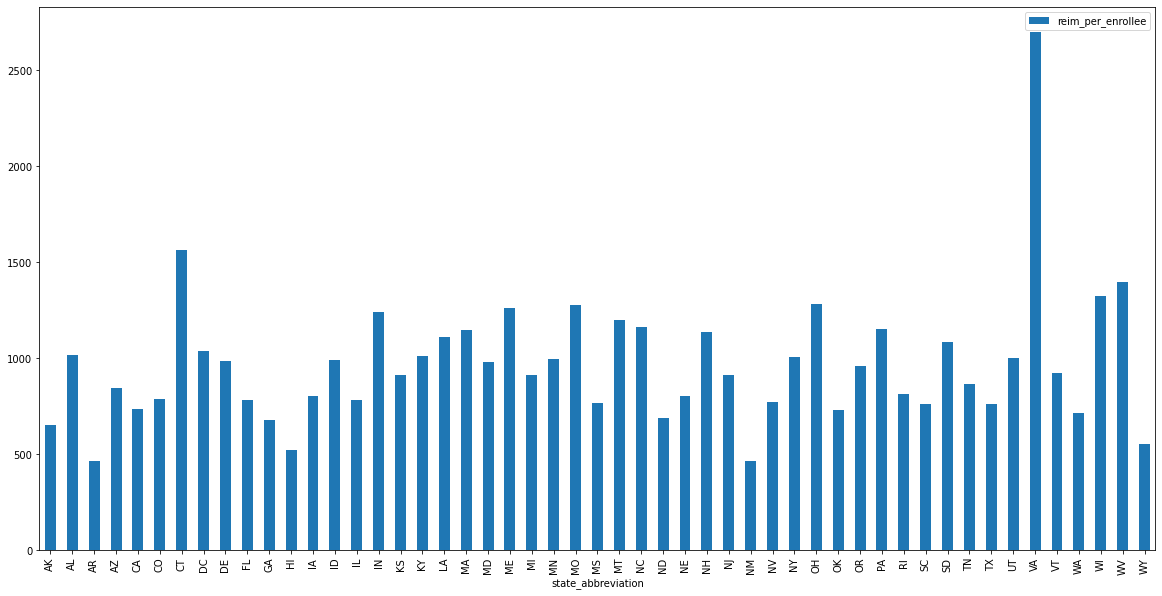

In [66]:
chart = merged_df.plot(kind= "bar", x = 'state_abbreviation', y = 'reim_per_enrollee', figsize = (20, 10))

# **Checking against https://www.kff.org/statedata/medicaid-pharmacy-benefits-state-fact-sheets/, data for Virginia looks inconsistent. They report \$1 Billion for 2018, but we have almost $4 Billion for 2020. CONCLUSION: SOMEHOW DATA FOR VIRGINIA IS INCONSISTENT. Other states statistics look more consistent.**

In [75]:
(f"${df_2020[df_2020['State'] == 'VA']['Total_Amount_Reimbursed'].sum():,.0f}")

'$3,983,885,038'

Create dictionary of summaries by state to see if we can glean insight

In [55]:
state_list = list(df_2020['State'].value_counts().index)

In [56]:
df_2020.columns

Index(['Utilization_Type', 'State', 'NDC', 'Labeler_Code', 'Product_Code',
       'Package_Size', 'Year', 'Quarter', 'Supression_Used', 'Product_Name',
       'Units_Reimbursed', 'Number_of_Prescriptions',
       'Total_Amount_Reimbursed', 'Medicaid_Amount_Reimbursed',
       'Non_Medicaid_Amount_Reimbursed'],
      dtype='object')

In [57]:
# Go through list of states
dict_summary = {}
for state in state_list:    
    df_temp = df_2020[df_2020['State'] == state]
    temp = pd.pivot_table(df_temp, index = ['Product_Name', 'NDC'], aggfunc={'Total_Amount_Reimbursed': 'sum',
                                                                             'Product_Name': np.size,
                                                                             'Number_of_Prescriptions': np.sum})
    temp['cost_per_prescription'] = temp['Total_Amount_Reimbursed'] / temp['Number_of_Prescriptions']
    temp['pct_of_total'] = temp['Total_Amount_Reimbursed'] / df_temp['Total_Amount_Reimbursed'].sum()
    temp['State'] = state
    dict_summary[state] = temp

In [60]:
# Iterate through dictionary to get the highest spend per state
for state in dict_summary.keys():
    df_temp = dict_summary[state]
    max = df_temp['Total_Amount_Reimbursed'].max()
    drug_name = df_temp[df_temp['Total_Amount_Reimbursed'] == max].index[0][0].strip().capitalize()
    reim = df_temp[df_temp['Total_Amount_Reimbursed'] == max].loc[:, 'Total_Amount_Reimbursed'].values[0]
    pct_total = df_temp[df_temp['Total_Amount_Reimbursed'] == max].loc[:, 'pct_of_total'].values[0]
    print(f"State: {state}, \n\tHighest reimbursement drug: {drug_name}, \
                            \n\tTotal reimbursment for drug: {reim: ,.0f},\
                            \n\tPercent of total: {pct_total:.2%}")

State: CA, 
	Highest reimbursement drug: Biktarvy,                             
	Total reimbursment for drug:  237,179,653,                            
	Percent of total: 2.88%
State: NY, 
	Highest reimbursement drug: Biktarvy,                             
	Total reimbursment for drug:  338,750,611,                            
	Percent of total: 5.53%
State: OH, 
	Highest reimbursement drug: Humira pen,                             
	Total reimbursment for drug:  90,111,519,                            
	Percent of total: 2.55%
State: KY, 
	Highest reimbursement drug: Humira(cf),                             
	Total reimbursment for drug:  48,061,287,                            
	Percent of total: 3.34%
State: PA, 
	Highest reimbursement drug: Biktarvy,                             
	Total reimbursment for drug:  112,652,651,                            
	Percent of total: 3.16%
State: MI, 
	Highest reimbursement drug: Biktarvy,                             
	Total reimbursment for drug:  60

## **Biktarvy (HIV/AIDS treatment) and Humira (rheumatoid arthritis, psoriatic arthritis, ankylosing spondylitis, Crohn's disease, ulcerative colitis, plaque psoriasis, hidradenitis suppurativa, uveitis, and juvenile idiopathic arthritis) top the expenditures of many states**